In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Step 1: Load the Data
df = pd.read_csv('/Users/kadiresindhureddy/Downloads/basic/weather.csv')

In [5]:
# Step 2: Data Exploration
print(df.head())
print(df.info())
print(df.describe())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

In [35]:
# Step 3: Data Cleaning
# Check for missing values and remove them for simplicity
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
TempDiff          0
dtype: int64


In [39]:
# Drop rows with missing values
df = df.dropna()
print("\nData shape after dropping missing values:", df.shape)


Data shape after dropping missing values: (328, 23)


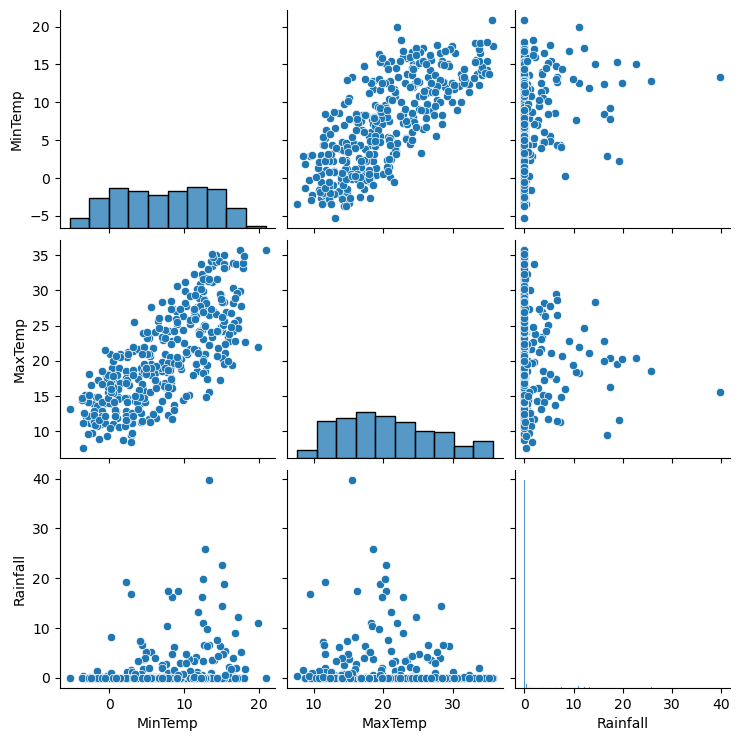

In [37]:
# Step 3: Data Visualization
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

In [9]:
# Example: Adding a new feature for Temperature Difference
df['TempDiff'] = df['MaxTemp'] - df['MinTemp']

In [15]:
print(df.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'TempDiff'],
      dtype='object')


In [17]:
# Calculate average MaxTemp across all records
avg_max_temp = df['MaxTemp'].mean()
print(f'Average Max Temperature: {avg_max_temp}')


Average Max Temperature: 20.550273224043714


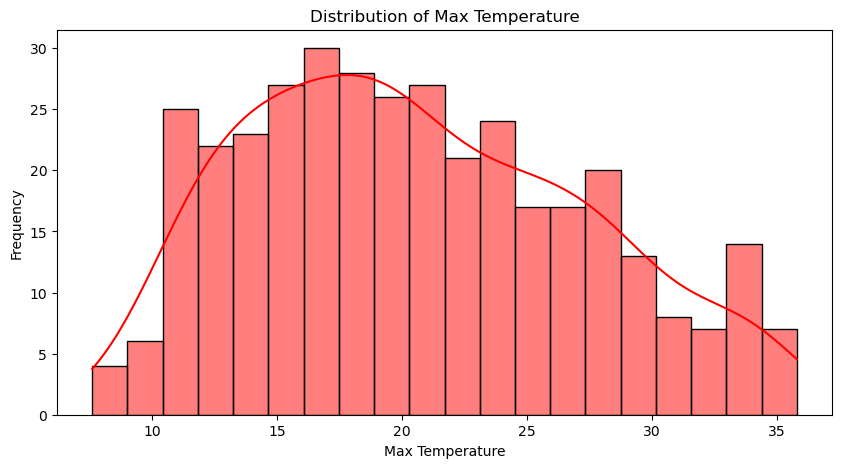

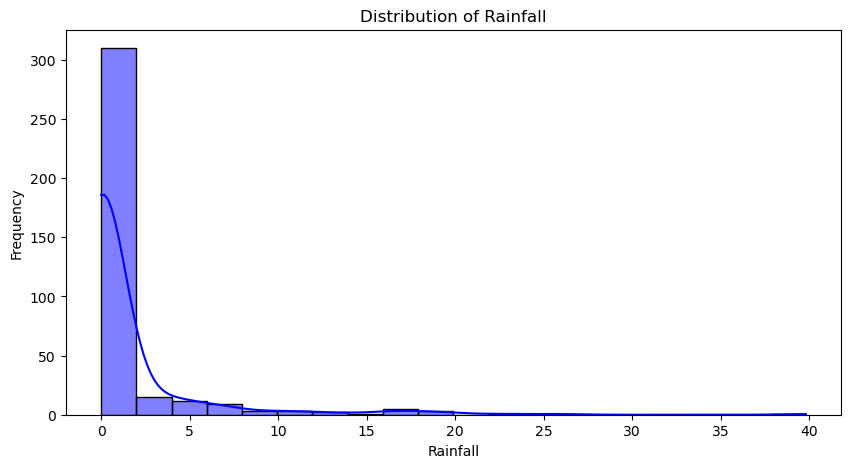

In [23]:
# Data Visualization: Distribution of MaxTemp and Rainfall
plt.figure(figsize=(10, 5))
sns.histplot(df['MaxTemp'], bins=20, kde=True,color='red')
plt.xlabel('Max Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Max Temperature')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(df['Rainfall'], bins=20, kde=True, color='blue')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Distribution of Rainfall')
plt.show()

Average Max Temperature: 20.897560975609757
Total Rainfall: 472.6


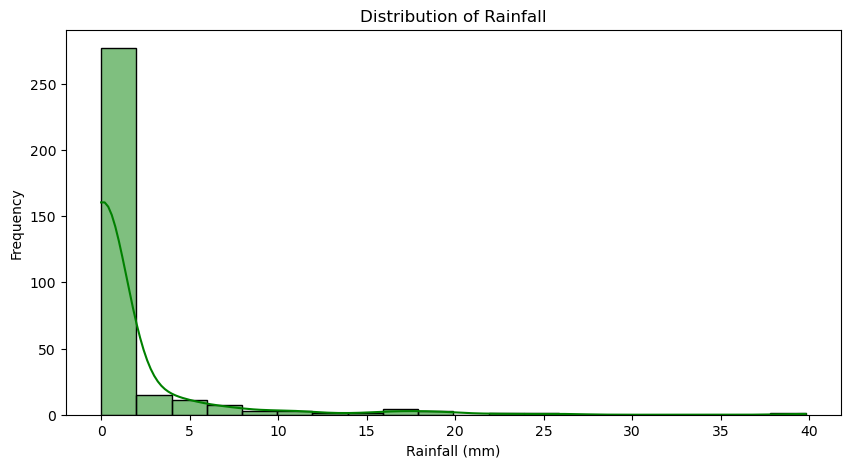

In [74]:
# Calculate the average Max Temperature for the entire dataset
avg_maxtemp = df['MaxTemp'].mean()
print(f'Average Max Temperature: {avg_maxtemp}')

# Calculate the total Rainfall for the entire dataset
total_rainfall = df['Rainfall'].sum()
print(f'Total Rainfall: {total_rainfall}')

# Plot the distribution of Rainfall
plt.figure(figsize=(10, 5))
sns.histplot(df['Rainfall'], kde=True, bins=20,color='green')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()


In [66]:
# Prediction Model for Rainfall based on available features
# Prepare the data
X = df[['MinTemp', 'MaxTemp', 'TempDiff']]  # Features available in dataset
y = df['Rainfall']

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:

# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

Mean Squared Error for Rainfall Prediction: 31.656246016069893
